In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the file,warning with encoding utf-8 ,for size and columns of different types.
import warnings
warnings.filterwarnings('ignore')

with open("crime.csv","rb") as crime:
    data=pd.read_csv(crime,sep=",",encoding='Windows 1252')

In [3]:
#1st question graphs
data.columns.values

array(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR',
       'UCR_PART', 'STREET', 'Lat', 'Long', 'Location'], dtype=object)

In [4]:
 #data shooting with nan ..replace with no 
data['SHOOTING']=data['SHOOTING'].fillna('No')


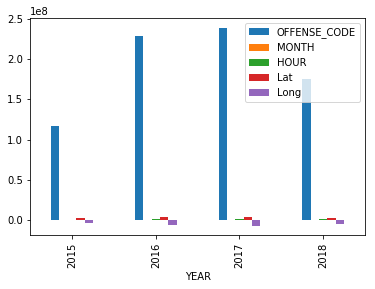

In [5]:
#for year
#the most crimes are in 2017
year_pl=data.groupby(['YEAR']).sum()
year_pl.plot.bar()

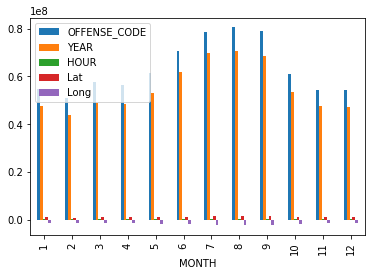

In [6]:
#for months
#months:8 (7,9)
month=data.groupby(['MONTH']).sum()
month.plot.bar()

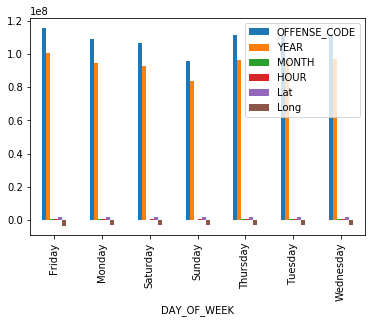

In [7]:
#for days
#on Friday,Tuesday and Wednesday
day=data.groupby(['DAY_OF_WEEK']).sum()
day.plot.bar()

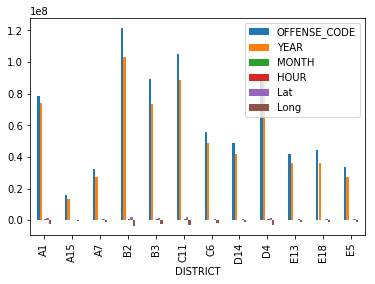

In [8]:
#for district
#B2
area=data.groupby(['DISTRICT']).sum()
area.plot.bar()

In [9]:
#2
#data['SHOOTING'].unique() so No or Y
#count of yes shooting for shootings of every year
#max 2017 with 371
s1=data[data['SHOOTING']=='Y'].groupby('YEAR')['SHOOTING'].count()
s1.idxmax()

2017

In [10]:
#count shooting per district...max b2 with 352
cs=data[data['SHOOTING']=='Y'].groupby('DISTRICT')['SHOOTING'].count()
cs.idxmax()

'B2'

In [11]:
#3
#day is max

#new column for day or night 
data['DN']=data['HOUR'].apply(lambda x:'Night' if x>=18 or x<=6 else 'Day')
#count how many days and how many nights are there
day_night=data['DN'].value_counts()
#get index of max value
day_night.idxmax()
#day_night.max()

'Day'

In [12]:
#4
#in day the most frequent type of offense
ofd=data['OFFENSE_CODE_GROUP'].groupby(data['DN']).value_counts()
#for having only the days ofd['Day'] 
ofd['Day'].idxmax()
#ofd['Day'].max()
#Motor Vehicle Accident Response is the most frequent type of offense

'Motor Vehicle Accident Response'

In [13]:
#5
#clustering kmeans
#the shape doesn't change just the area is divided into more pieces..(the pieces are n_clusters in number)
k=10
from sklearn.cluster import KMeans
km=KMeans(n_clusters=k)
#coordinates lat,log 
coordinates=data[['Lat','Long']]
#problem with nan here so remove them
coordinates=coordinates.dropna()

coordinates=coordinates.loc[(coordinates['Lat']>40)& (coordinates['Long']<-60)]

km.fit(coordinates) 
km.predict(coordinates)
lb=km.labels_

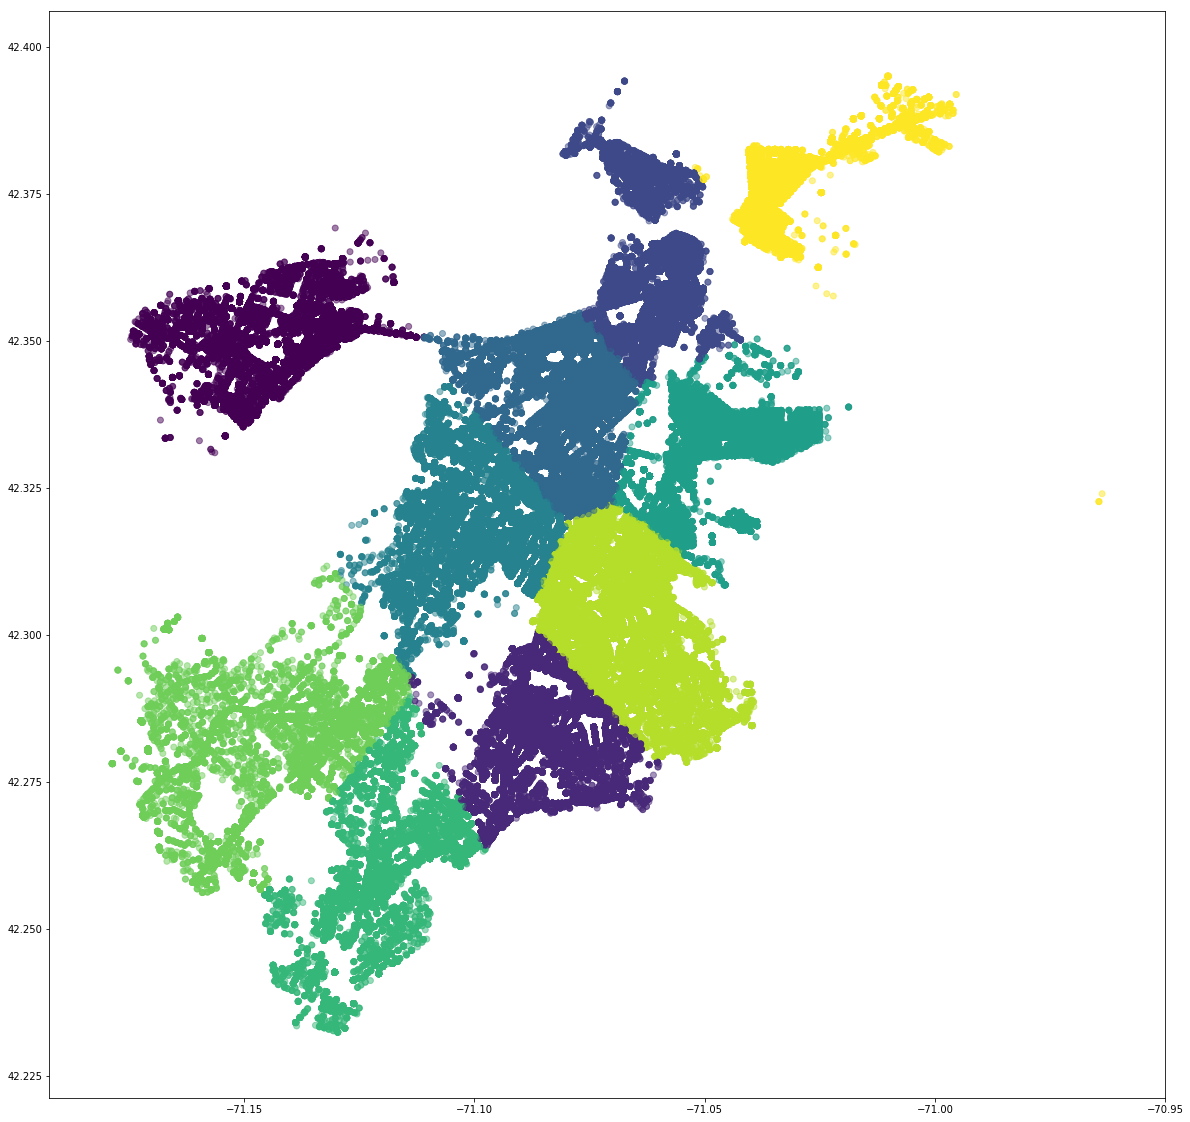

In [14]:
x=coordinates['Long']
y=coordinates['Lat']
#to have as many colors as we need
colors=lb.astype(float)
plt.figure(figsize=(20,20))
plt.scatter(x,y,c=colors,alpha=0.5)
plt.show()

location=(lat,long)
Tο month και offence_code δεν επηρεάζουν τις διαστάσεις του γραφήματος σε αυτή την άσκηση, επηρεάζουν όμως τα clusters που θα δημιουργηθούν. Αλλάζουν τα σημεία στο χώρο και ο kmeans δεν έχει τη δυνατότητα να βρει εύκολα τα clusters με τη νέα μεταβλητή.Γι' αυτό έχουν αυτή τη μορφή τα επόμενα διαγράμματα και ειδικά στο offence_code είναι ανακατεμένα τα σημεία και όχι διαχωρισμένα και ξεκάθαρα όπως στο (lat,long).
 

In [15]:
cl=5
mloc=data[['Lat','Long','MONTH']]
mloc.dropna()
mloc=mloc.loc[(mloc['Lat']>40)& (mloc['Long']<-60)]
km2=KMeans(n_clusters=cl)
km2.fit(mloc)
km2.predict(mloc)
lb2=km2.labels_

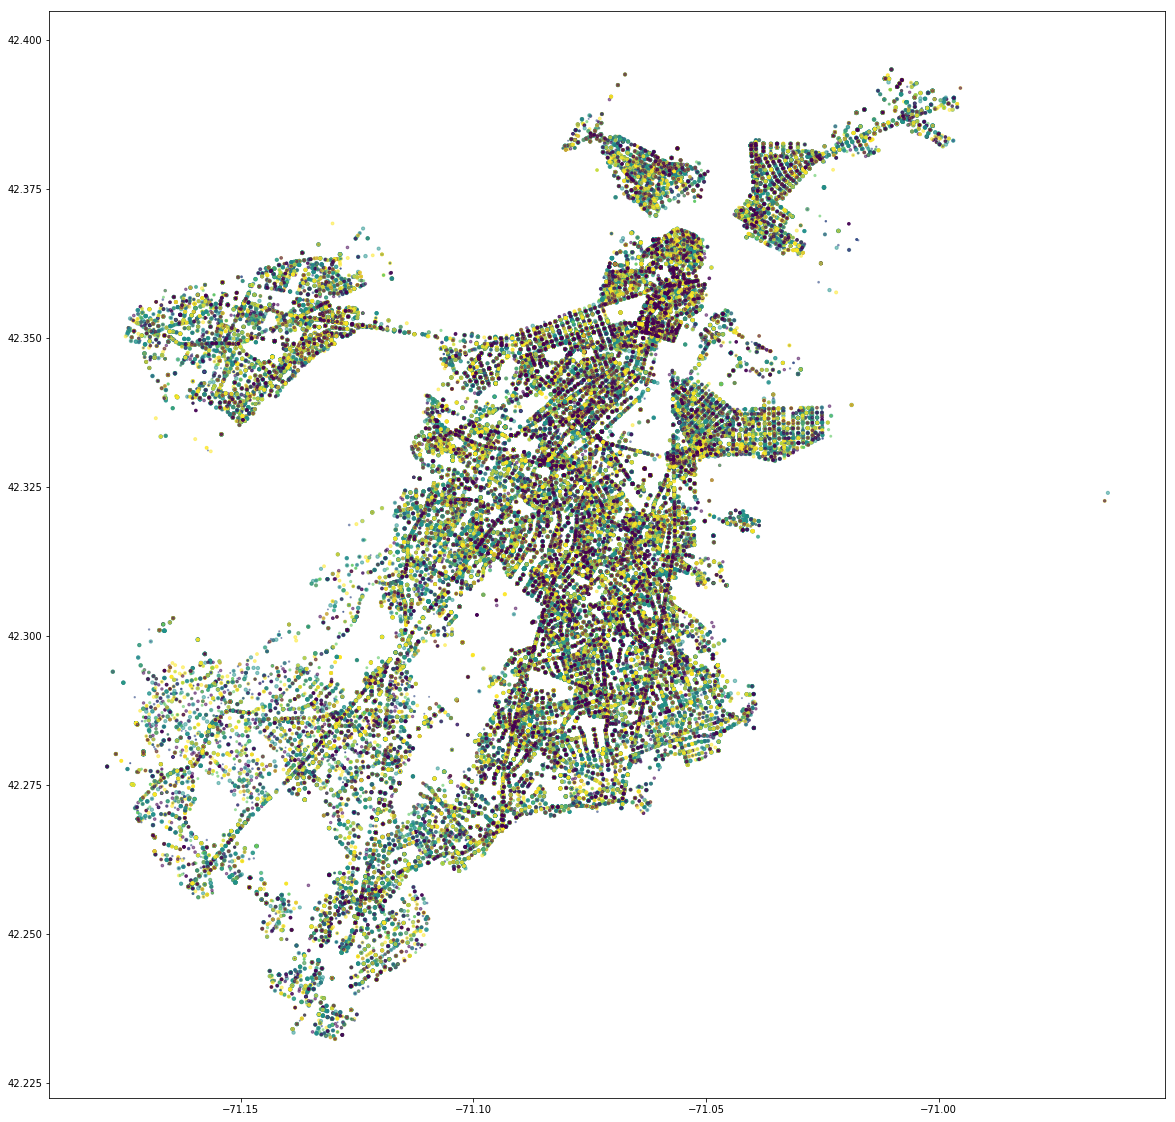

In [16]:
x=mloc['Long']
y=mloc['Lat']
z=mloc['MONTH']
colors=lb2.astype(float)
plt.figure(figsize=(20,20))
plt.scatter(x,y,z,c=colors,alpha=0.5)
plt.show()

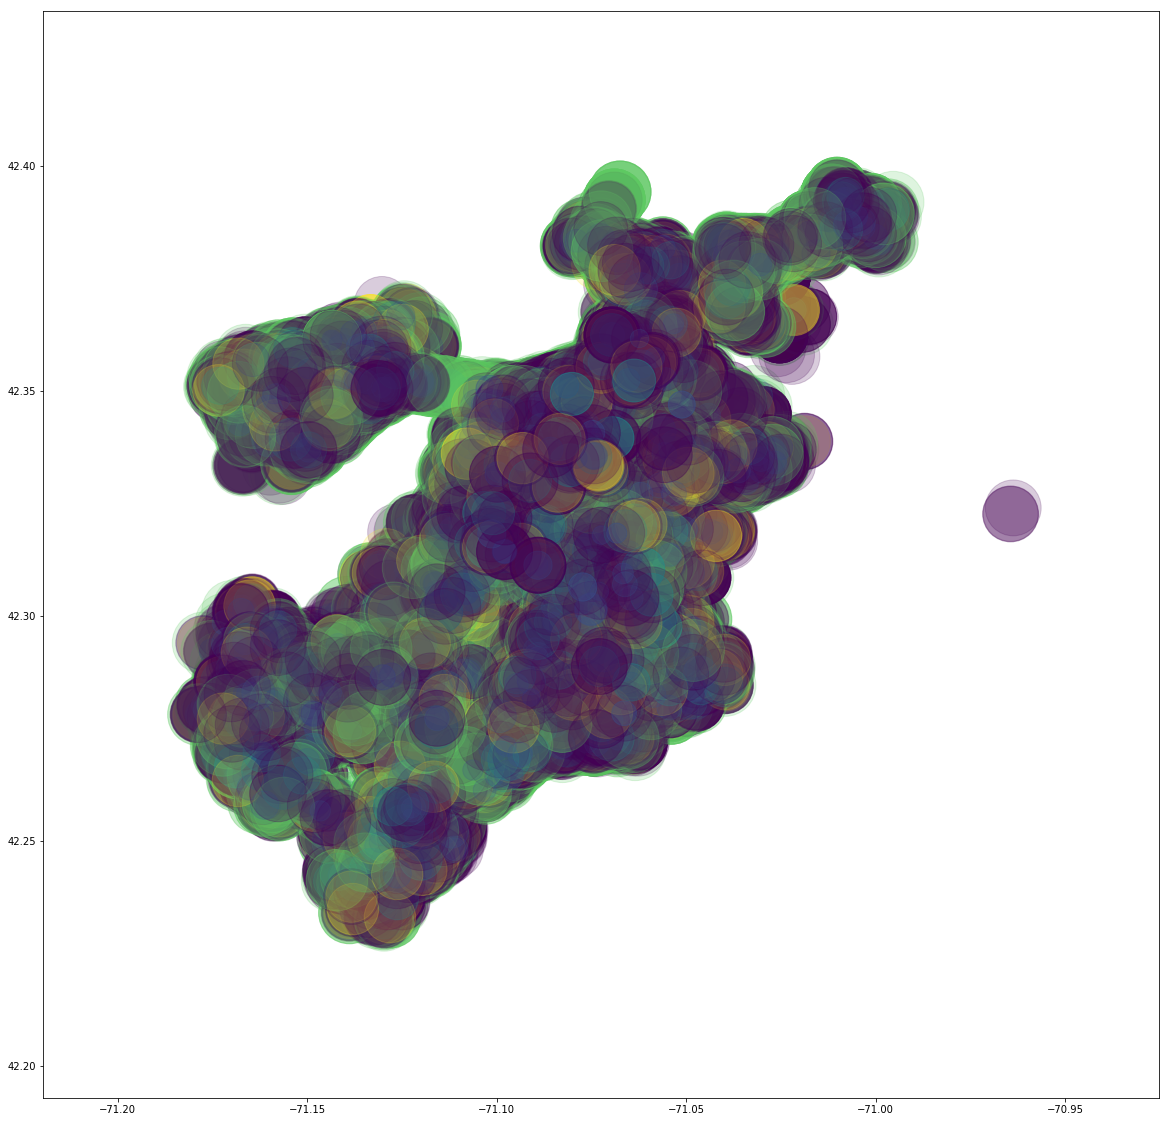

In [17]:
cl=5
oloc=data[['Lat','Long','OFFENSE_CODE']]
oloc.dropna()
oloc=oloc.loc[(oloc['Lat']>40)& (oloc['Long']<-60)]
km2=KMeans(n_clusters=cl)
km2.fit(oloc)
km2.predict(oloc)
lb2=km2.labels_
x=oloc['Long']
y=oloc['Lat']
z=oloc['OFFENSE_CODE']
colors=lb2.astype(float)
plt.figure(figsize=(20,20))
plt.scatter(x,y,z,c=colors,alpha=0.2)
plt.show()